In [27]:
import numpy as np
import math
import numpy.random
import scipy
import scipy.stats

def truncate(a):
    dist = math.sqrt(a[0]**2 + a[1]**2)
    if dist > 0.5:
        a_truncate = [x / dist * .5 for x in a]
    else:
        a_truncate = a
    return a_truncate

def torus_board_full(s, border):
    s[0] = (s[0] + border) % (2*border) - border
    s[1] = (s[1] + border) % (2*border) - border
    return s

def transition_likelihood_full(s, a, sPrime, truncate):
    a_truncate = truncate(a)
    x_pdf = scipy.stats.norm.pdf(sPrime[0], s[0] + a_truncate[0], 1)
    y_pdf = scipy.stats.norm.pdf(sPrime[1], s[1] + a_truncate[1], 1)
    return x_pdf*y_pdf

def transition_full(s, a, sPrime, torus_board): #(s, a, sPrime)?
    #I = np.ones(len(s))
    sPrime = numpy.random.normal(s[0]+truncate(a)[0], 0.25, 1)
    sPrime = np.concatenate((sPrime, numpy.random.normal(s[1]+truncate(a)[1], 0.25, 1)))
    return torus_board(sPrime)

def transition_reward_full(s, a, sPrime, r, torus_board): #?(s, a, sPrime)
    sPrime = torus_board(sPrime)
    a = truncate(a)
    dist = math.sqrt(a[0]**2 + a[1]**2)
    return r(sPrime) - 0.1*dist

def observation(sPrime, o, sigmaO): #?(sPrime, a, o)
    obs = numpy.random.normal(sPrime[0], sigmaO, 1)
    obs = np.concatenate((obs, numpy.random.normal(sPrime[1], sigmaO, 1)))
    return obs

def observation_likelihood(sPrime, o, sigmaO):
    x_pdf = scipy.stats.norm.pdf(sPrime[0], o[0], sigmaO)
    y_pdf = scipy.stats.norm.pdf(sPrime[1], o[1], sigmaO)
    return x_pdf*y_pdf

def main():
    border = 10
    r = lambda sPrime: 1
    torus_board = lambda s: torus_board_full(s, border)
    transition = lambda s, a, sPrime: transition_full(s, a, sPrime, torus_board)
    transition_reward = lambda s, a, sPrime: transition_reward_full(s, a, sPrime, r, torus_board)
    transition_likelihood = lambda s, a, sPrime: transition_likelihood_full(s, a, sPrime, truncate)


    s = [0, 0]
    a = [.6, 0]
    sigma0 = [0, 1.5, 3]
    sPrime = [.4, 0]


    sPrime = transition(s, a, sPrime)

    print(sPrime)

    sPrime_pdf = transition_likelihood(s, a, sPrime)

    print(sPrime_pdf)

    reward = transition_reward(s, a, sPrime)
    print(reward)

    obs = observation(sPrime, 1, sigma0[1])
    print(obs)
    obs_pdf = observation_likelihood(sPrime, obs, sigma0[1])
    print(obs_pdf)

if __name__ == '__main__':
    main()

[0.42480083 0.09736864]
0.1579550389992691
0.95
[ 0.26364488 -0.62260597]
0.06267638444953308


In [28]:
main()

[ 0.64875888 -0.11616688]
0.15634517745263668
0.95
[ 1.64968084 -1.3253403 ]
0.04091123158904469


In [3]:
truncate([0.1, 0.2])

[0.1, 0.2]

In [16]:
truncate([0, 50])

[0.5, 0.0]

In [19]:
truncate([1, 50])

[0.00999800059980007, 0.49990002999000355]

In [32]:
torus_board = lambda s: torus_board_full(s, 10)

In [24]:
#truncate
check = []
for i in range(1000): 
    x = [np.random.uniform(1, 1000000000000), np.random.uniform(1, 1000000000000)]
    x = truncate(x) 
    if math.sqrt(x[0]**2 + x[1]**2) <= 0.5: 
        check.append(True) 
print(all(check))

True


In [17]:
torus_board_full([-55, 75], 10)

[5, -5]

In [20]:
torus_board_full([16, 0], 10)

[-4, 0]

In [21]:
torus_board_full([3, 10], 10)

[3, -10]

In [33]:
#transition_full
check = []
s = [0, 0]
a = [1, 0]
for i in range(10000): 
    np.random.seed(1000)
    sprime = transition_full(s, a, [100000, 0], torus_board)
    s = sprime
    check.append(s)
#why is sPrime predetermined if it's not used in the function? Changing the value of sprime while setting the seed yields no difference

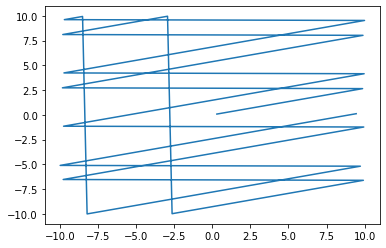

In [21]:
import matplotlib.pyplot as plt 
plt.plot(*zip(*check[:500]))

(array([3.000e+00, 0.000e+00, 4.000e+00, 1.400e+01, 1.600e+01, 3.100e+01,
        4.600e+01, 6.000e+01, 1.300e+02, 1.670e+02, 3.100e+02, 4.230e+02,
        5.840e+02, 9.200e+02, 1.257e+03, 1.647e+03, 2.186e+03, 2.782e+03,
        3.397e+03, 4.174e+03, 4.650e+03, 5.495e+03, 5.763e+03, 6.283e+03,
        6.540e+03, 6.634e+03, 6.551e+03, 6.334e+03, 5.837e+03, 5.228e+03,
        4.689e+03, 3.992e+03, 3.411e+03, 2.782e+03, 2.121e+03, 1.668e+03,
        1.227e+03, 8.480e+02, 6.300e+02, 4.000e+02, 2.890e+02, 1.790e+02,
        1.150e+02, 8.700e+01, 4.600e+01, 2.100e+01, 1.200e+01, 1.300e+01,
        2.000e+00, 2.000e+00]),
 array([-7.14548019e-01, -6.72584449e-01, -6.30620878e-01, -5.88657308e-01,
        -5.46693737e-01, -5.04730167e-01, -4.62766596e-01, -4.20803026e-01,
        -3.78839455e-01, -3.36875885e-01, -2.94912314e-01, -2.52948744e-01,
        -2.10985173e-01, -1.69021603e-01, -1.27058032e-01, -8.50944615e-02,
        -4.31308910e-02, -1.16732044e-03,  4.07962501e-02,  8.27598206e-

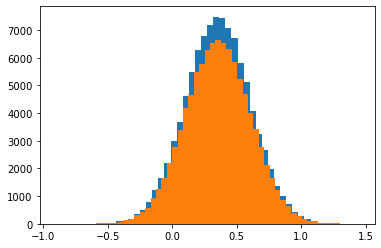

In [32]:
x = []
y = []
s = [0, 0]
a = [1, 1]
border = 10
s_prime = []
torus_board = lambda s: torus_board_full(s, border)
for i in range(100000): 
    sprime = transition_full(s, a, [15000, 2000], torus_board)
    s_prime.append(sprime)
    x.append(sprime[0])
    y.append(sprime[1])
plt.hist(x, bins = 50)
plt.hist(y, bins = 50)

In [63]:
print(np.mean(x), np.mean(y))
print(np.std(x), np.std(y))

0.4997875502530502 0.0019611526981076705
0.24990482421130852 0.24875786054552657


In [55]:
#observation 
x = []
y = []
s = [50, 90]
a = [1, 0]
sigma0 = [0, 1.5, 3]
for i in range(10000): 
    obs = observation(s, sigma0[1], 1)
    x.append(obs[0])
    y.append(obs[1])
#o not used in the function

(array([  5.,   1.,   1.,   7.,   6.,   5.,  11.,  22.,  30.,  43.,  55.,
         79., 104., 157., 166., 207., 246., 320., 399., 420., 468., 567.,
        581., 608., 598., 589., 572., 519., 516., 479., 420., 382., 329.,
        249., 194., 175., 131., 113.,  71.,  50.,  30.,  23.,  17.,  14.,
          6.,   3.,   5.,   0.,   2.,   5.]),
 array([86.30993902, 86.45831528, 86.60669154, 86.7550678 , 86.90344407,
        87.05182033, 87.20019659, 87.34857285, 87.49694912, 87.64532538,
        87.79370164, 87.9420779 , 88.09045417, 88.23883043, 88.38720669,
        88.53558295, 88.68395922, 88.83233548, 88.98071174, 89.129088  ,
        89.27746426, 89.42584053, 89.57421679, 89.72259305, 89.87096931,
        90.01934558, 90.16772184, 90.3160981 , 90.46447436, 90.61285063,
        90.76122689, 90.90960315, 91.05797941, 91.20635568, 91.35473194,
        91.5031082 , 91.65148446, 91.79986072, 91.94823699, 92.09661325,
        92.24498951, 92.39336577, 92.54174204, 92.6901183 , 92.83849456,
 

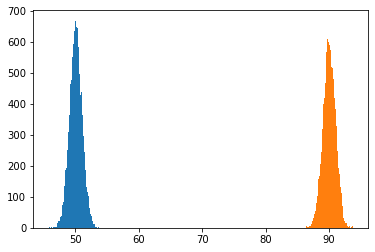

In [54]:
plt.hist(x, bins = 50)
plt.hist(y, bins = 50)

In [56]:
print(np.mean(x), np.mean(y))
print(np.std(x), np.std(y))

49.99896109160327 89.98917926259156
1.007341885749109 0.9905467198591673


In [27]:
d = []
s = [0, 0]
a = [1, 1]
r = lambda sPrime: 1
transition_reward_full(s, a, [50, 90], r, torus_board)

0.95

(array([3.000e+00, 2.000e+00, 1.000e+00, 5.000e+00, 6.000e+00, 1.400e+01,
        2.100e+01, 2.900e+01, 5.700e+01, 6.300e+01, 8.200e+01, 1.220e+02,
        1.660e+02, 2.060e+02, 2.800e+02, 3.730e+02, 4.610e+02, 5.430e+02,
        6.730e+02, 8.640e+02, 1.029e+03, 1.209e+03, 1.459e+03, 1.703e+03,
        1.947e+03, 2.139e+03, 2.474e+03, 2.739e+03, 3.105e+03, 3.416e+03,
        3.528e+03, 3.832e+03, 4.050e+03, 4.318e+03, 4.587e+03, 4.600e+03,
        4.822e+03, 4.745e+03, 4.877e+03, 4.781e+03, 4.557e+03, 4.355e+03,
        4.222e+03, 3.874e+03, 3.409e+03, 3.052e+03, 2.561e+03, 2.063e+03,
        1.559e+03, 1.017e+03]),
 array([0.03289697, 0.03542207, 0.03794716, 0.04047226, 0.04299736,
        0.04552245, 0.04804755, 0.05057265, 0.05309775, 0.05562284,
        0.05814794, 0.06067304, 0.06319814, 0.06572323, 0.06824833,
        0.07077343, 0.07329852, 0.07582362, 0.07834872, 0.08087382,
        0.08339891, 0.08592401, 0.08844911, 0.09097421, 0.0934993 ,
        0.0960244 , 0.0985495 , 0.10

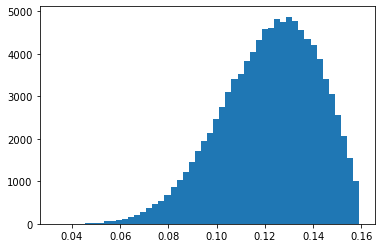

In [40]:
d = []
s = [0, 0]
a = [0.5, 1] #truncate(a)
for i in range(len(s_prime)): 
    d.append(transition_likelihood_full(s, a, s_prime[i], lambda a: a)) #test without truncate
plt.hist(d, bins = 50)

(array([2.000e+00, 0.000e+00, 1.000e+00, 0.000e+00, 0.000e+00, 2.000e+00,
        0.000e+00, 1.000e+00, 4.000e+00, 2.000e+00, 7.000e+00, 8.000e+00,
        2.400e+01, 2.000e+01, 3.200e+01, 5.100e+01, 8.000e+01, 7.300e+01,
        1.160e+02, 1.720e+02, 2.150e+02, 2.900e+02, 3.920e+02, 4.620e+02,
        6.680e+02, 9.280e+02, 1.133e+03, 1.367e+03, 1.704e+03, 2.129e+03,
        2.524e+03, 3.043e+03, 3.741e+03, 4.255e+03, 4.758e+03, 5.392e+03,
        6.051e+03, 6.407e+03, 6.944e+03, 7.013e+03, 7.158e+03, 6.816e+03,
        6.376e+03, 5.669e+03, 4.778e+03, 3.768e+03, 2.742e+03, 1.603e+03,
        8.050e+02, 2.740e+02]),
 array([0.01391442, 0.0139898 , 0.01406519, 0.01414057, 0.01421595,
        0.01429134, 0.01436672, 0.0144421 , 0.01451749, 0.01459287,
        0.01466825, 0.01474364, 0.01481902, 0.0148944 , 0.01496979,
        0.01504517, 0.01512055, 0.01519594, 0.01527132, 0.01534671,
        0.01542209, 0.01549747, 0.01557286, 0.01564824, 0.01572362,
        0.01579901, 0.01587439, 0.01

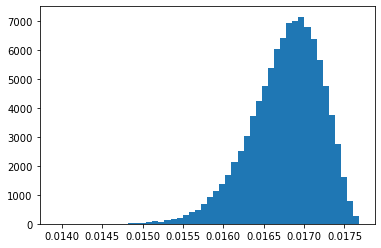

In [39]:
d = []
sprime = [1, 1]

for i in range(len(s_prime)): 
    d.append(observation_likelihood(sprime, s_prime[i], 3))
plt.hist(d, bins = 50)